In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
plt.style.use('ggplot')
pd.set_option('max_columns', None)
pd.set_option('max_rows', 20)

In [407]:
file = '/Users/tim/Documents/GitHub/pandas_additional/data/ikea.csv'
df = pd.read_csv(file)

### Basic Information about the Dataset

In [408]:
df.shape

(3694, 14)

In [409]:
df.drop('Unnamed: 0', axis=1, inplace=True)

    Data Explanation

    item_id : Item identification number
    name : The name of the product
    category : The category of the product
    price : The price of the product [SR]
    old_price : The old price of the product [ No old price/ SR 995 / Other ]
    sellable_online : Whether or not the IKEA product is sellable online [True/False]
    link : A link to IKEA product
    other_colors : Other colors that the IKEA product is available in [Yes/No]
    short_description : A short description of the IKEA product
    designer : The designer of the IKEA product
    depth : The depth of the IKEA product
    height : The height of the IKEA product
    width : The width of the IKEA product

In [410]:
df.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [411]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


### Data Exploration

    'name' column looks ok, but not much cleaning to do either. 
    'name' should retain the data type of 'object'

In [412]:
df[df['name'].str.len() == df['name'].str.len().max()]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1429,69161203,RYDEBÄCK/BACKARYD / JANINGE,Chairs,1215.0,"SR 1,395",True,https://www.ikea.com/sa/en/p/rydebaeck-backary...,No,"Table and 4 chairs, 150 cm",IKEA of Sweden/John/Jonas/Petrus/Paul/Caroline...,NaN,75.0,78.0
1506,89161565,VÄSTANBY/VÄSTANÅ / BERNHARD,Chairs,4295.0,"SR 4,475",True,https://www.ikea.com/sa/en/p/vaestanby-vaestan...,No,"Table and 4 chairs, 170 cm",Chris Martin/Ola Wihlborg/IKEA of Sweden,NaN,75.0,78.0
1546,19103183,VÄSTANBY/VÄSTANÅ / BERNHARD,Chairs,4295.0,"SR 4,475",True,https://www.ikea.com/sa/en/p/vaestanby-vaestan...,No,"Table and 4 chairs, 170 cm",Chris Martin/Ola Wihlborg/IKEA of Sweden,NaN,75.0,78.0
1547,19130501,SLÄHULT/DALSHULT / LEIFARNE,Chairs,1975.0,No old price,True,https://www.ikea.com/sa/en/p/slaehult-dalshult...,No,"Table and 4 chairs, 185 cm",Mia Lagerman/IKEA of Sweden/Wiebke Braasch,NaN,73.0,90.0
1577,69130612,VÄSTANBY/VÄSTANÅ / LEIFARNE,Chairs,2095.0,"SR 2,275",True,https://www.ikea.com/sa/en/p/vaestanby-vaestan...,No,"Table and 4 chairs, 170 cm",Mia Lagerman/IKEA of Sweden/Chris Martin,NaN,75.0,78.0
1578,69161552,RYDEBÄCK/BACKARYD / JANINGE,Chairs,1395.0,"SR 1,450",True,https://www.ikea.com/sa/en/p/rydebaeck-backary...,No,"Table and 4 chairs, 150 cm",David Wahl/IKEA of Sweden/John/Jonas/Petrus/Pa...,NaN,75.0,78.0
3085,19130501,SLÄHULT/DALSHULT / LEIFARNE,Tables & desks,1975.0,No old price,True,https://www.ikea.com/sa/en/p/slaehult-dalshult...,No,"Table and 4 chairs, 185 cm",Mia Lagerman/IKEA of Sweden/Wiebke Braasch,NaN,73.0,90.0
3115,69130612,VÄSTANBY/VÄSTANÅ / LEIFARNE,Tables & desks,2095.0,"SR 2,275",True,https://www.ikea.com/sa/en/p/vaestanby-vaestan...,No,"Table and 4 chairs, 170 cm",Mia Lagerman/IKEA of Sweden/Chris Martin,NaN,75.0,78.0
3116,69161552,RYDEBÄCK/BACKARYD / JANINGE,Tables & desks,1395.0,"SR 1,450",True,https://www.ikea.com/sa/en/p/rydebaeck-backary...,No,"Table and 4 chairs, 150 cm",David Wahl/IKEA of Sweden/John/Jonas/Petrus/Pa...,NaN,75.0,78.0
3179,19103183,VÄSTANBY/VÄSTANÅ / BERNHARD,Tables & desks,4295.0,"SR 4,475",True,https://www.ikea.com/sa/en/p/vaestanby-vaestan...,No,"Table and 4 chairs, 170 cm",Chris Martin/Ola Wihlborg/IKEA of Sweden,NaN,75.0,78.0


In [413]:
df[df['name'].str.len() == df['name'].str.len().min()]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1870,20400243,LEN,Nursery furniture,89.0,No old price,True,https://www.ikea.com/sa/en/p/len-nursing-pillo...,No,"Nursing pillow, 60x50x18 cm",IKEA of Sweden,NaN,18.0,50.0
2666,50161321,HOL,Tables & desks,395.0,No old price,True,https://www.ikea.com/sa/en/p/hol-storage-table...,No,"Storage table, 98x50 cm",IKEA of Sweden,NaN,50.0,50.0
2728,70161320,HOL,Tables & desks,225.0,No old price,True,https://www.ikea.com/sa/en/p/hol-side-table-ac...,No,"Side table, 50x50 cm",IKEA of Sweden,NaN,50.0,50.0
2976,20400243,LEN,Tables & desks,89.0,No old price,True,https://www.ikea.com/sa/en/p/len-nursing-pillo...,No,"Nursing pillow, 60x50x18 cm",IKEA of Sweden,NaN,18.0,50.0
3459,29385672,PAX,Wardrobes,840.0,SR 925,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",IKEA of Sweden/Ehlén Johansson,58.0,201.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,59324248,PAX,Wardrobes,2710.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",IKEA of Sweden/Ehlén Johansson/Ola Wihlborg,58.0,236.0,150.0
3672,29306217,PAX,Wardrobes,3055.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-blac...,No,"Wardrobe, 150x66x236 cm",Ehlén Johansson/IKEA of Sweden,66.0,236.0,150.0
3675,59264843,PAX,Wardrobes,3760.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-whit...,No,"Wardrobe, 150x66x236 cm",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0
3678,89025790,PAX,Wardrobes,3055.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-blac...,No,"Wardrobe, 150x66x236 cm",Ehlén Johansson/IKEA of Sweden,66.0,236.0,150.0


In [414]:
df['name'].value_counts()

BESTÅ                173
PAX                  111
GRÖNLID               83
TROFAST               74
BEKANT                74
                    ... 
GÅRÖ                   1
BRENNÅSEN              1
FEJAN                  1
IKEA PS VÅGÖ           1
PAX / MEHAMN/AULI      1
Name: name, Length: 607, dtype: int64

<AxesSubplot:>

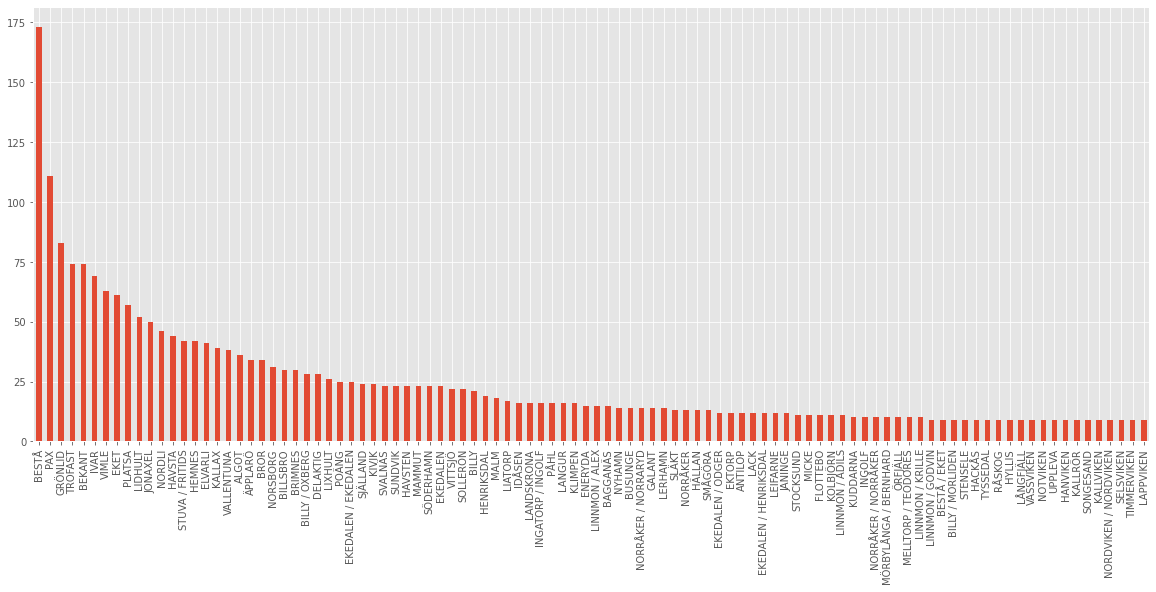

In [415]:
df['name'].value_counts()[0:100].plot(kind='bar', figsize=(20,8))

    'category' looks alright
    should change the category from 'object' to 'category'

In [416]:
df['category'].dtype

dtype('O')

In [417]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

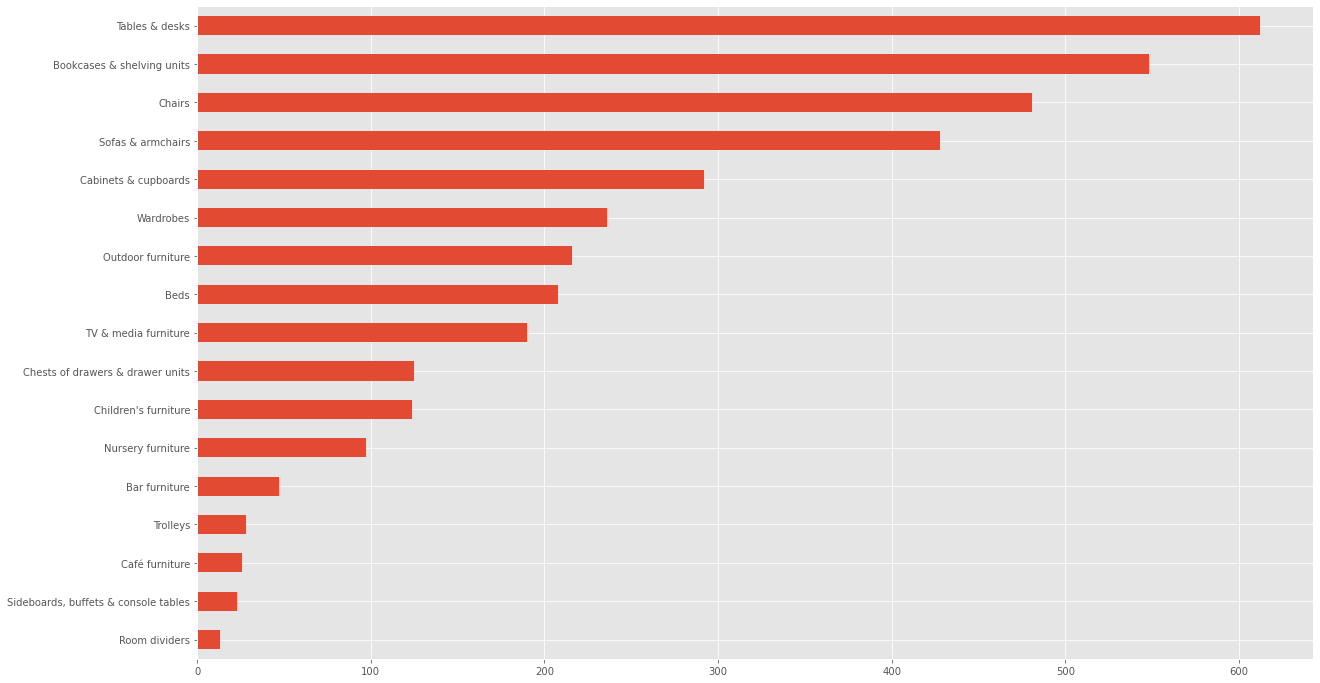

In [418]:
df['category'].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(20,12)).invert_yaxis()

In [460]:
df['category'] = df['category'].astype('category')

    'old_price'
    A significant proportion (82%) did not have a change in price.
    The rest, however, are tagged in undecipherable code of 'SR' followed by some numbers
    A cursory comparison of old price reveals that old price might be somewhat correlated to old price. We can consider converting this column into an int, and maybe create an additional column to compute the difference between the old_price and (current) price

In [421]:
df['old_price'].dtype

dtype('O')

In [422]:
df['old_price'].value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,145           1
SR 39              1
SR 2,105           1
SR 752             1
SR 1,050           1
Name: old_price, Length: 365, dtype: int64

In [423]:
def data_cleaning_old_price(x:str) -> int:
    if ('50/4' in x) or ('10/4' in x) or ('100/4' in x):
        return float(x.split(' ')[1].replace(',', '').replace('/4', ''))
    elif ('445/2' in x) or ('175/2' in x):
        return float(x.split(' ')[1].replace(',', '').replace('/2', ''))
    elif x.startswith('SR'):
        return float(x.split(' ')[1].replace(',', ''))
    else:
        return np.nan

In [424]:
df['old_price_cleaned'] = df['old_price'].apply(lambda x: data_cleaning_old_price(x))

In [425]:
df.drop('old_price', axis=1, inplace=True)

    'price_minus_old_price'

In [426]:
df['price_minus_old_price'] = df['old_price_cleaned'] - df['price']

In [427]:
df['price_minus_old_price'].fillna(0, inplace=True)

<AxesSubplot:ylabel='Frequency'>

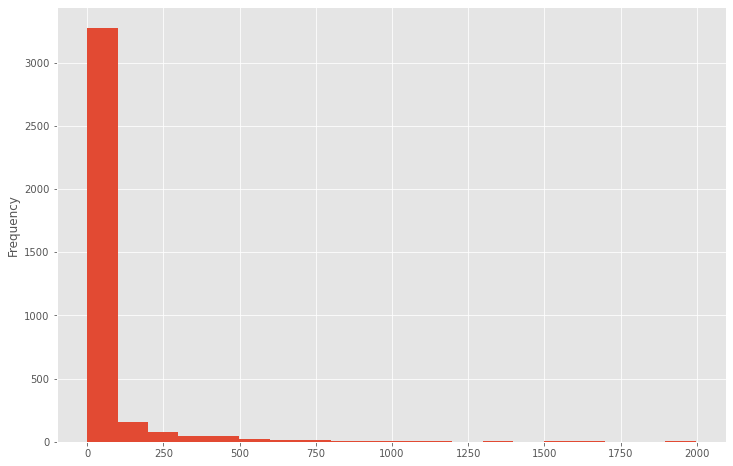

In [428]:
df['price_minus_old_price'].plot.hist(bins=20, figsize=(12,8))

    'sellable_online'

In [429]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [430]:
df['sellable_online'] = df['sellable_online'].astype('bool')

    'link'
    

In [431]:
df.drop('link', axis=1, inplace=True)

    'other_colours'

In [432]:
df['other_colors'] = df['other_colors'].astype('category')

In [433]:
df['other_colors'].value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

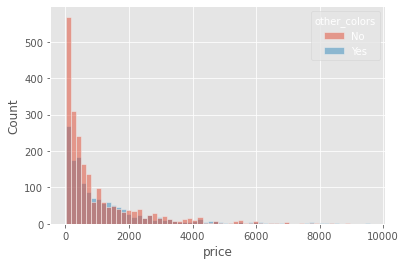

In [434]:
sns.histplot(x='price', hue='other_colors', data=df)

    'short description'

In [435]:
df['short_description'].value_counts()

        Chair                                     59
        Table,          120x60 cm                 40
        Table,          150x75 cm                 36
        Door,          60x64 cm                   30
        3-seat sofa                               30
                                                  ..
        Top and plinth,          40x47 cm          1
        Chest of 9 drawers,          160x99 cm     1
        Chest of 2 drawers,          40x99 cm      1
        Chest of 6 drawers,          80x99 cm      1
        1 section,          92x51x222-350 cm       1
Name: short_description, Length: 1706, dtype: int64

In [436]:
df.drop('short_description', axis=1, inplace=True)

    'designer'
    suspect some data integrity issues here because some of them are description of the furniture instead of the designer. but not sure if we can solve it.
    To be fair, we might not even need this because this might not contribute to the analysis


In [437]:
df['designer'].value_counts()

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                  828
Ehlén Johansson                                                                                                                                                                                                                                                                                                                                                                                                                 161
Francis Cayouette                                                                                                                                               

In [438]:
df[df['designer'].apply(lambda x: len(x) > 50)]

,item_id,name,category,price,sellable_online,other_colors,designer,depth,height,width,old_price_cleaned,price_minus_old_price
51,50468953,VATTVIKEN,Beds,995.0,True,No,504.689.53 Small and easy-to-place chair-bed w...,83.0,86.0,92.0,NaN,0.0
77,90331091,RIDABU,Beds,100.0,True,No,903.310.91 The door can be hung with the openi...,NaN,120.0,40.0,125.0,25.0
104,44361010,BRYNE,Beds,49.0,True,No,443.610.10 Easy to keep clean since you can re...,NaN,NaN,NaN,NaN,0.0
122,70284203,ASKEBY,Beds,995.0,True,No,"702.842.03 A sofa-bed with small, neat dimensi...",72.0,72.0,149.0,NaN,0.0
132,90299449,TUFFING,Beds,645.0,True,No,902.994.49 A good solution where space is limi...,NaN,179.0,97.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3453,60441562,TIMMERVIKEN,TV & media furniture,60.0,True,No,604.415.62 Drawers make it easy to keep your t...,NaN,26.0,60.0,NaN,0.0
3474,50422494,GODISHUS,Wardrobes,395.0,True,No,504.224.94 You can position the shelf and clot...,51.0,178.0,60.0,NaN,0.0
3538,49324946,PAX / TYSSEDAL,Wardrobes,6065.0,True,No,Ebba Strandmark/IKEA of Sweden/Ola Wihlborg/Eh...,60.0,236.0,250.0,NaN,0.0
3593,29320732,PAX / TYSSEDAL,Wardrobes,3190.0,True,Yes,IKEA of Sweden/Ola Wihlborg/Ehlén Johansson/Eb...,60.0,236.0,150.0,NaN,0.0


In [439]:
df = df.drop('designer', axis=1)

    'depth'

In [440]:
df['depth'].value_counts().sum()

2231

In [441]:
df['depth'].isna().sum() / df.shape[0]

0.39604764482945315

In [442]:
df['height'].value_counts().sum()

2706

In [443]:
df['height'].isna().sum() / df.shape[0]

0.2674607471575528

In [444]:
df['width'].value_counts().sum()

3105

In [445]:
df['width'].isna().sum() / df.shape[0]

0.15944775311315648

<AxesSubplot:ylabel='Frequency'>

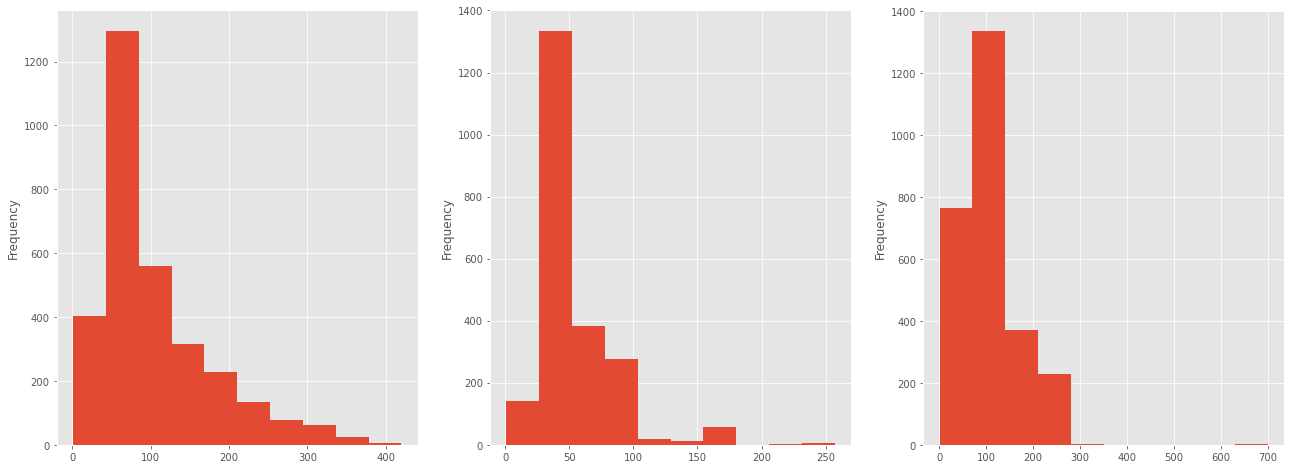

In [446]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(22, 8)

df['width'].plot(kind='hist', ax=ax.flatten()[0])
df['depth'].plot(kind='hist', ax=ax.flatten()[1])
df['height'].plot(kind='hist', ax=ax.flatten()[2])

### Data Cleaning

    finding the median depth, height, and width for each dimension
    then incorporating them into the dataframe

In [447]:
median_depth = df.groupby('category')[['depth']].agg('median').reset_index().rename(columns={'depth':'median_depth'})
median_height = df.groupby('category')[['height']].agg('median').reset_index().rename(columns={'height':'median_height'})
median_width = df.groupby('category')[['width']].agg('median').reset_index().rename(columns={'width':'median_width'})

In [448]:
median_size = pd.concat([median_depth, median_height, median_width], axis=1).T.drop_duplicates().T

In [449]:
median_size.head()

,category,median_depth,median_height,median_width
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0


In [450]:
df = df.merge(right=median_size, how='inner', on='category')

In [451]:
df['depth'].fillna(df['median_depth'], inplace=True)
df['height'].fillna(df['median_height'], inplace=True)
df['width'].fillna(df['median_width'], inplace=True)

In [452]:
df.drop(['median_depth', 'median_height', 'median_width'], axis=1, inplace=True)

In [453]:
df['volume'] = df['depth'] * df['width'] * df['height']

<AxesSubplot:ylabel='Frequency'>

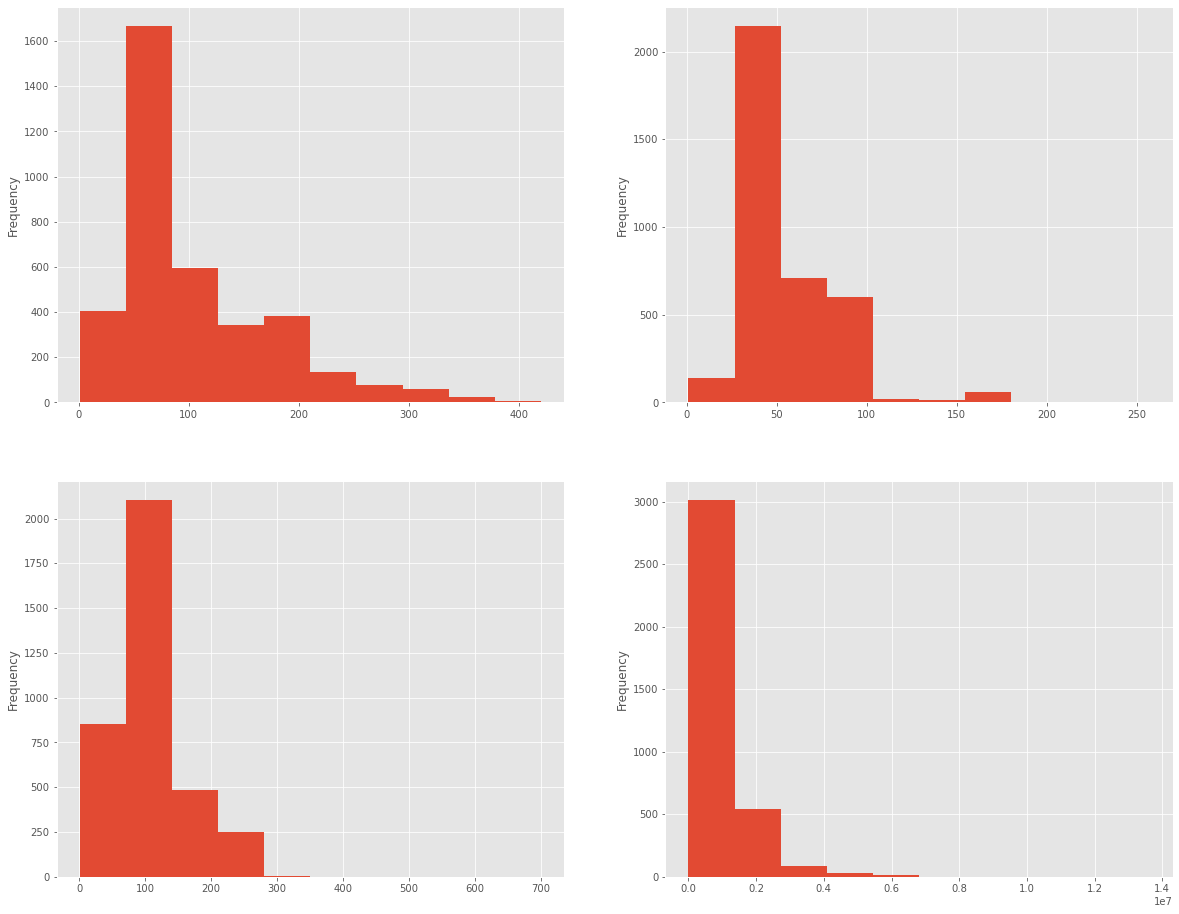

In [454]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20, 16)

df['width'].plot(kind='hist', ax=ax.flatten()[0])
df['depth'].plot(kind='hist', ax=ax.flatten()[1])
df['height'].plot(kind='hist', ax=ax.flatten()[2])
df['volume'].plot(kind='hist', ax=ax.flatten()[3])

### Check for Duplicates

In [455]:
df.head()

,item_id,name,category,price,sellable_online,other_colors,depth,height,width,old_price_cleaned,price_minus_old_price,volume
0,90420332,FREKVENS,Bar furniture,265.0,True,No,47.0,99.0,51.0,NaN,0.0,237303.0
1,368814,NORDVIKEN,Bar furniture,995.0,False,No,47.0,105.0,80.0,NaN,0.0,394800.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,False,No,47.0,102.0,48.0,NaN,0.0,230112.0
3,80155205,STIG,Bar furniture,69.0,True,Yes,50.0,100.0,60.0,NaN,0.0,300000.0
4,30180504,NORBERG,Bar furniture,225.0,True,No,60.0,43.0,74.0,NaN,0.0,190920.0


In [456]:
df[df['item_id'].duplicated(keep=False)].sort_values('item_id')

,item_id,name,category,price,sellable_online,other_colors,depth,height,width,old_price_cleaned,price_minus_old_price,volume
1918,91415,TROFAST,Nursery furniture,5.0,True,No,44.0,86.5,28.0,NaN,0.0,106568.0
1834,91415,TROFAST,Children's furniture,5.0,True,No,45.0,67.0,28.0,NaN,0.0,84420.0
151,102065,LYCKSELE LÖVÅS,Beds,495.0,True,No,88.0,84.0,140.0,NaN,0.0,1034880.0
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,True,No,98.0,83.0,196.0,NaN,0.0,1594264.0
2178,105064,LIATORP,"Sideboards, buffets & console tables",445.0,True,No,40.0,75.0,37.0,NaN,0.0,111000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1853,99323614,SMÅGÖRA,Nursery furniture,370.0,True,No,40.0,91.0,60.0,NaN,0.0,218400.0
3028,99323925,STENSELE,Tables & desks,550.0,True,No,46.0,104.0,70.0,NaN,0.0,334880.0
29,99323925,STENSELE,Bar furniture,550.0,True,No,47.0,104.0,70.0,NaN,0.0,342160.0
2737,99902661,VITTSJÖ,Tables & desks,609.0,True,No,36.0,74.0,202.0,NaN,0.0,538128.0


<AxesSubplot:xlabel='category', ylabel='other_colors'>

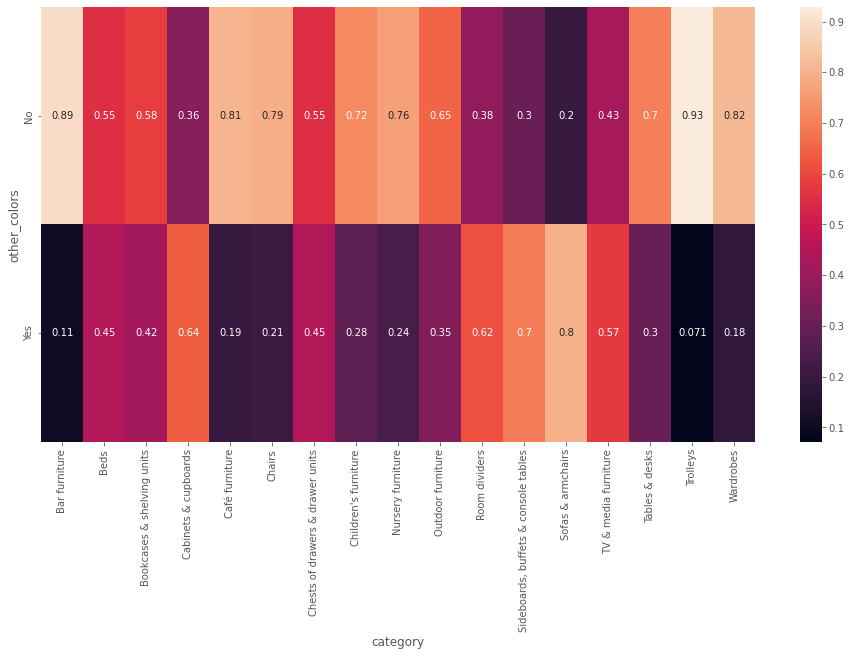

In [472]:
plt.figure(figsize=(16,8))
sns.heatmap(pd.crosstab(index=df['other_colors'], columns=df['category'], normalize='columns'), annot=True)

### Model

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   item_id                3694 non-null   int64   
 1   name                   3694 non-null   object  
 2   category               3694 non-null   object  
 3   price                  3694 non-null   float64 
 4   sellable_online        3694 non-null   bool    
 5   other_colors           3694 non-null   category
 6   depth                  3694 non-null   float64 
 7   height                 3694 non-null   float64 
 8   width                  3694 non-null   float64 
 9   old_price_cleaned      654 non-null    float64 
 10  price_minus_old_price  3694 non-null   float64 
 11  volume                 3694 non-null   float64 
dtypes: bool(1), category(1), float64(7), int64(1), object(2)
memory usage: 324.8+ KB


In [467]:
continuous_var = ['price', 'price_minus_old_price', 'depth', 'height', 'width', 'volume' ]
categorical_var = ['category', 'sellable_online', 'other_colors']

In [468]:
df_continuous = df[continuous_var]
df_categorical = df[categorical_var]

In [473]:
from sklearn.preprocessing import LabelEncoder

In [483]:
df['category'].cat.categories

Index(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', 'Children's furniture',
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'TV & media furniture', 'Tables & desks', 'Trolleys', 'Wardrobes'],
      dtype='object')

In [476]:
df_categorical = df_categorical.apply(LabelEncoder().fit_transform)

In [484]:
df_update = pd.concat([df_categorical, df_continuous], axis=1)

In [485]:
df_update

,category,sellable_online,other_colors,price,price_minus_old_price,depth,height,width,volume
0,0,1,0,265.0,0.0,47.0,99.0,51.0,237303.0
1,0,0,0,995.0,0.0,47.0,105.0,80.0,394800.0
2,0,0,0,2095.0,0.0,47.0,102.0,48.0,230112.0
3,0,1,1,69.0,0.0,50.0,100.0,60.0,300000.0
4,0,1,0,225.0,0.0,60.0,43.0,74.0,190920.0
...,...,...,...,...,...,...,...,...,...
3689,16,1,0,750.0,70.0,50.0,236.0,91.0,1073800.0
3690,16,1,0,1572.0,183.0,50.0,236.0,135.0,1593000.0
3691,16,1,0,924.0,126.0,50.0,236.0,175.0,2065000.0
3692,16,1,0,2745.0,385.0,50.0,236.0,178.0,2100400.0


In [486]:
from sklearn.model_selection import train_test_split

In [489]:
X = df_update.drop('price', axis=1)
y = df_update[['price']]

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [492]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [508]:
vif_df

,feature,vif_score
0,const,167.947472
1,category,1.051265
2,sellable_online,1.006629
3,other_colors,1.101328
4,price_minus_old_price,1.113978
5,depth,2.710608
6,height,2.076956
7,width,4.001627
8,volume,7.877849


In [521]:
X = add_constant(X_train)
vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index = X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.iloc[1:, :].copy()
vif_df

,feature,vif_score
1,category,1.051265
2,sellable_online,1.006629
3,other_colors,1.101328
4,price_minus_old_price,1.113978
5,depth,2.710608
6,height,2.076956
7,width,4.001627
8,volume,7.877849


In [514]:
vif_df

,feature,vif_score
0,const,167.947472
1,category,1.051265
2,sellable_online,1.006629
3,other_colors,1.101328
4,price_minus_old_price,1.113978
5,depth,2.710608
6,height,2.076956
7,width,4.001627
8,volume,7.877849


In [499]:
vif_df = pd.DataFrame([vif(X_train.values, i) for i in range(X_train.shape[1])], 
              index=X_train.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
0,category,3.634748
1,sellable_online,25.610037
2,other_colors,1.868962
3,price_minus_old_price,1.195897
4,depth,13.074505
5,height,7.996794
6,width,12.941251
7,volume,11.731861
